In [1]:
import pickle
from pathlib import Path
import numpy as np
from typing import Dict
import os
from multiprocessing import cpu_count

In [2]:
MALWARE_DIR = Path('malware_samples/')  # Directory containing malware type folders
MALWARE_TYPES = ['winwebsec', 'zbot', 'zeroaccess']  # Malware type folder names
MAX_SAMPLES_PER_TYPE = 200  # Set to -1 to read all files, or set to maximum number of files per folder
EMBEDDING_SIZE = 128        # Dimension of the embeddings (vectors)
SAVED_MODELS_DIR = Path('saved_models/distilbert/')
os.makedirs(SAVED_MODELS_DIR, exist_ok=True)
NUM_CORES = cpu_count()

In [3]:
filename = SAVED_MODELS_DIR / 'mean_embedding_per_file.pkl'
mean_embeddings: Dict[Path, np.ndarray] = {}

# Load MEAN_EMBEDDING_PER_FILE to a pickle file
with filename.open('rb') as f:
    mean_embeddings = pickle.load(f)

In [4]:
# Collect embeddings and labels
embeddings = []
labels = []

for (malware_type, _), E in mean_embeddings.items():
    embeddings.append(E)
    labels.append(malware_type)

embeddings = np.array(embeddings)
labels = np.array(labels)

embeddings.shape, labels.shape

((6, 768), (6,))

In [5]:
from sklearn.cluster import KMeans

n_clusters = len(MALWARE_TYPES)
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(embeddings)

In [6]:
# Evaluate clustering performance
from sklearn.metrics import adjusted_rand_score, homogeneity_score

# Map malware types to numerical labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
true_labels = le.fit_transform(labels)

ari = adjusted_rand_score(true_labels, clusters)
homogeneity = homogeneity_score(true_labels, clusters)

print(f'Adjusted Rand Index: {ari}')
print(f'Homogeneity Score: {homogeneity}')

Adjusted Rand Index: 1.0
Homogeneity Score: 1.0


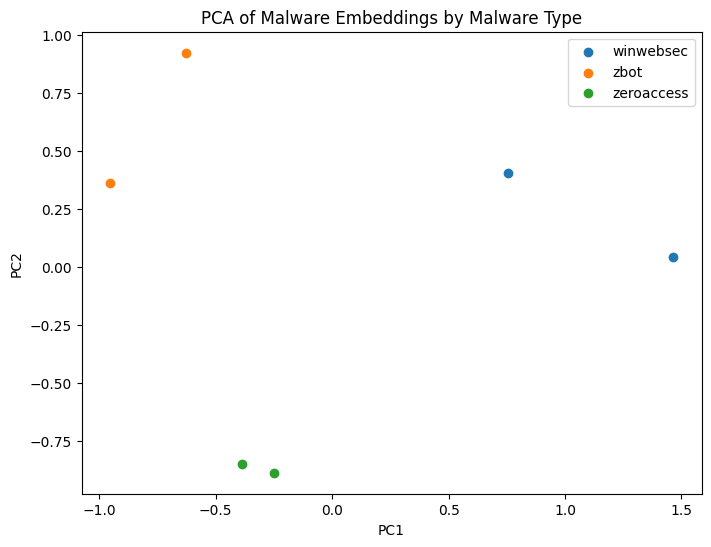

In [7]:
# Visualize embeddings using PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot embeddings colored by malware type
plt.figure(figsize=(8,6))
for malware_type in np.unique(labels):
    idx = labels == malware_type
    plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], label=malware_type)
plt.legend()
plt.title('PCA of Malware Embeddings by Malware Type')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [8]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, clusters)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[0 0 2]
 [2 0 0]
 [0 2 0]]
